In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [2]:
url= 'https://raw.githubusercontent.com/namnamu97/Predicitve-Model-on-Luxstay-Rental-prices/master/luxstay_hanoi_27-12-2019_clean.csv'
df= pd.read_csv(url)
df.drop('Link', axis= 1, inplace= True)
df.head()

,Price,District,Type of Home,Building Name,Guest,Bedroom,Bathroom
0,127.0,Ba Đình,Condominium,Vinhomes Metropolis,8,3,2
1,79.0,Ba Đình,Condominium,Vinhomes Metropolis,4,2,2
2,71.0,Ba Đình,Condominium,Vinhomes Metropolis,5,2,2
3,83.0,Ba Đình,Condominium,Vinhomes Metropolis,4,2,2
4,71.0,Ba Đình,Condominium,None,4,2,2


In [3]:
#rename columns for convinience
df.rename(columns= {'Price': 'price', 'District':'district', 'Type of Home': 'type', 
                    'Building Name':'building', 'Guest': 'guest', 'Bedroom': 'bedroom', 'Bathroom': 'bathroom'}, inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2675 non-null   float64
 1   district  2675 non-null   object 
 2   type      2675 non-null   object 
 3   building  2675 non-null   object 
 4   guest     2675 non-null   int64  
 5   bedroom   2675 non-null   int64  
 6   bathroom  2675 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 146.4+ KB


In [5]:
df.describe().round(2)

,price,guest,bedroom,bathroom
count,2675.00,2675.00,2675.00,2675.00
mean,51.89,4.65,1.63,1.49
std,55.48,4.50,1.09,1.00
min,8.00,1.00,1.00,1.00
25%,24.00,2.00,1.00,1.00
50%,35.00,4.00,1.00,1.00
75%,61.00,5.00,2.00,2.00
max,945.00,60.00,17.00,17.00


In [4]:
df['district'].unique()

array(['Ba Đình', 'Hai Bà Trưng', 'Tây Hồ', 'Nam Từ Liêm', 'Sóc Sơn',
       'Đống Đa', 'Hoàn Kiếm', 'Cầu Giấy', 'Thanh Xuân', 'Long Biên',
       'Hoàng Mai', 'Đông Anh', 'Bắc Từ Liêm', 'Ba Vì', 'Hà Đông',
       'Thạch Thất', 'Chương Mỹ', 'Quốc Oai', 'Sơn Tây'], dtype=object)

In [5]:
#rename district without vietnamese tounge
df.replace({'district':{'Ba Đình': 'BaDinh', 'Hai Bà Trưng': 'HaiBaTrung', 'Tây Hồ': 'TayHo', 'Nam Từ Liêm': 'NamTuLiem', 'Sóc Sơn': 'SocSon',
                       'Đống Đa': 'DongDa', 'Hoàn Kiếm': 'HoanKiem', 'Cầu Giấy': 'CauGiay', 'Thanh Xuân': 'ThanhXuan', 'Long Biên': 'LongBien',
                       'Hoàng Mai': 'HoangMai', 'Đông Anh': 'DongAnh', 'Bắc Từ Liêm': 'BacTuLiem', 'Ba Vì': 'BaVi', 'Hà Đông': 'HaDong',
                       'Thạch Thất': 'ThachThat', 'Chương Mỹ': 'ChuongMy', 'Quốc Oai': 'QuocOai', 'Sơn Tây': 'SonTay'}}, inplace= True)

In [6]:
df['district'].unique()

array(['BaDinh', 'HaiBaTrung', 'TayHo', 'NamTuLiem', 'SocSon', 'DongDa',
       'HoanKiem', 'CauGiay', 'ThanhXuan', 'LongBien', 'HoangMai',
       'DongAnh', 'BacTuLiem', 'BaVi', 'HaDong', 'ThachThat', 'ChuongMy',
       'QuocOai', 'SonTay'], dtype=object)

In [7]:
df['building'].unique()

array([' Vinhomes Metropolis', 'None',
       ' Chung cư Sun Grand City Ancora Residence',
       ' Vinhomes Times City', ' Vinhomes SkyLake',
       ' Vinhomes Nguyễn Chí Thanh', '  Nam Trung Yên', ' Imperia Garden',
       ' Chung cư The Artemis', ' Chung cư The Sun Mễ Trì',
       '  The Golden Palm', ' Vinhomes Green Bay',
       " Chung cư Vinhomes D' Capitale\u200e Trần Duy Hưng",
       ' Chung cư Times City Park Hill', ' Indochina Plaza Hanoi (IPH)',
       ' Vinhomes Gardenia', ' Chung cư Lancaster Núi Trúc',
       ' TNR Goldmark City', ' Hong Kong Tower', ' Vinhomes Royal City',
       ' D’. Le Roi Soleil Quảng An', ' Chung cư Mipec Riverside',
       ' Chung cư The Link Ciputra', ' Chung cư 30 Phạm Văn Đồng',
       ' Chung cư Ecolife Capitol', ' Chung cư Seasons Avenue',
       ' Chung cư Eurowindow Multi Complex',
       ' Chung cư Hoàng Cầu Skyline', ' Chung cư FLC Green Home',
       ' Chung cư D2 Giảng Võ', ' Chung cư MBLand Central Field',
       ' Chung cư D’. Le Pon

In [8]:
df.replace({'building': {' Vinhomes Metropolis': 'VinhomesMetropolis',
       ' Chung cư Sun Grand City Ancora Residence': 'SunGrandCityAncoraResidence',
       ' Vinhomes Times City': 'VinhomesTimesCity', ' Vinhomes SkyLake': 'VinhomesSkyLake',
       ' Vinhomes Nguyễn Chí Thanh': 'VinhomesNguyenChiThanh', '  Nam Trung Yên': 'NamTrungYen', ' Imperia Garden': 'ImperiaGarden',
       ' Chung cư The Artemis': 'TheArtemis', ' Chung cư The Sun Mễ Trì': 'TheSunMetri',
       '  The Golden Palm': 'TheGoldenPalm', ' Vinhomes Green Bay': 'VinhomesGreenBay',
       " Chung cư Vinhomes D' Capitale\u200e Trần Duy Hưng": 'VinhomesCapitaleTranDuyHung',
       ' Chung cư Times City Park Hill': 'TimesCityParkHill', ' Indochina Plaza Hanoi (IPH)': 'IndochinaPlazaHanoi',
       ' Vinhomes Gardenia': 'VinhomesGardenia', ' Chung cư Lancaster Núi Trúc': 'LancasterNuiTruc',
       ' TNR Goldmark City': 'TNRGoldMarkCity', ' Hong Kong Tower': 'HongKongTower', ' Vinhomes Royal City': 'VinhomesRoyalCity',
       ' D’. Le Roi Soleil Quảng An': 'LeRoiSoleilQuangAn', ' Chung cư Mipec Riverside': 'MipecRiverside',
       ' Chung cư The Link Ciputra': 'TheLinkCiputra', ' Chung cư 30 Phạm Văn Đồng': '30PhamVanDong',
       ' Chung cư Ecolife Capitol': 'EcolifeCapitol', ' Chung cư Seasons Avenue': 'SeasonsAvenue',
       ' Chung cư Eurowindow Multi Complex': 'EuroWindowMultiComplex',
       ' Chung cư Hoàng Cầu Skyline': 'HoangCauSkyline', ' Chung cư FLC Green Home': 'FLCGreenHome',
       ' Chung cư D2 Giảng Võ': 'D2GiangVo', ' Chung cư MBLand Central Field': 'MBLandCentralField',
       ' Chung cư D’. Le Pont D’or Hoàng Cầu': 'DLePontDorHoangCau', ' Lotte Center Hà Nội': 'LotteCenterHanoi',
       ' Biệt thự nghỉ dưỡng Rose Garden Resort': 'RoseGardenResort', '  Sky Center': 'SkyCenter',
       ' Keangnam Hanoi Landmark Tower': 'KeangamHanoiLandmarkTower', ' Chung cư Việt Đức Complex': 'VietDucComplex',
       ' Cao ốc văn phòng ITT Building': 'ITTBuilding', ' Chung cư B4 - B14 Kim Liên': 'B4B14KimLien',
       ' Chung cư Imperial Plaza': 'ImperialPlaza', ' Chung cư Gelexia Riverside': 'GelexiaRiverside',
       ' Chung cư The Legend Tower': 'TheLegendTower', ' Chung cư Star City': 'StarCity',
       ' Chung cư FLC Star Tower': 'FLCStarTower', ' Chung cư Mỹ Đình Plaza 2': 'MyDinhPlaza2',
       ' Chung cư Vinata Tower': 'VinataTower', ' Chung cư Sun Grand City': 'SunGrandCity',
       ' Tổ hợp PVV - Vinapharm 60B Nguyễn Huy Tưởng': 'PVVVinapharmNguyenHuyTuong',
       ' Chung cư Discovery Complex': 'DiscoveryComplex', ' Chung cư Home City': 'HomeCity',
       ' Chung cư Ecolife Tây Hồ': 'EcolifeTayHo', '  Royal Garden':'RoyalGarden',
       '  Louis City Đại Mỗ': 'LouisCityDaMo'}}, inplace= True)

In [9]:
df['building'].unique()

array(['VinhomesMetropolis', 'None', 'SunGrandCityAncoraResidence',
       'VinhomesTimesCity', 'VinhomesSkyLake', 'VinhomesNguyenChiThanh',
       'NamTrungYen', 'ImperiaGarden', 'TheArtemis', 'TheSunMetri',
       'TheGoldenPalm', 'VinhomesGreenBay', 'VinhomesCapitaleTranDuyHung',
       'TimesCityParkHill', 'IndochinaPlazaHanoi', 'VinhomesGardenia',
       'LancasterNuiTruc', 'TNRGoldMarkCity', 'HongKongTower',
       'VinhomesRoyalCity', 'LeRoiSoleilQuangAn', 'MipecRiverside',
       'TheLinkCiputra', '30PhamVanDong', 'EcolifeCapitol',
       'SeasonsAvenue', 'EuroWindowMultiComplex', 'HoangCauSkyline',
       'FLCGreenHome', 'D2GiangVo', 'MBLandCentralField',
       'DLePontDorHoangCau', 'LotteCenterHanoi', 'RoseGardenResort',
       'SkyCenter', 'KeangamHanoiLandmarkTower', 'VietDucComplex',
       'ITTBuilding', 'B4B14KimLien', 'ImperialPlaza', 'GelexiaRiverside',
       'TheLegendTower', 'StarCity', 'FLCStarTower', 'MyDinhPlaza2',
       'VinataTower', 'SunGrandCity', 'PVVVinap

In [10]:
df.head(10)

,price,district,type,building,guest,bedroom,bathroom
0,127.0,BaDinh,Condominium,VinhomesMetropolis,8,3,2
1,79.0,BaDinh,Condominium,VinhomesMetropolis,4,2,2
2,71.0,BaDinh,Condominium,VinhomesMetropolis,5,2,2
3,83.0,BaDinh,Condominium,VinhomesMetropolis,4,2,2
4,71.0,BaDinh,Condominium,None,4,2,2
5,88.0,BaDinh,Studio Apartment,VinhomesMetropolis,2,1,1
6,43.0,HaiBaTrung,Condominium,SunGrandCityAncoraResidence,5,2,2
7,44.0,HaiBaTrung,Condominium,VinhomesTimesCity,3,1,1
8,53.0,TayHo,Service Apartment,None,3,1,1
9,57.0,NamTuLiem,Condominium,VinhomesSkyLake,4,2,2


In [12]:
df.isnull().sum()

price       0
district    0
type        0
building    0
guest       0
bedroom     0
bathroom    0
dtype: int64

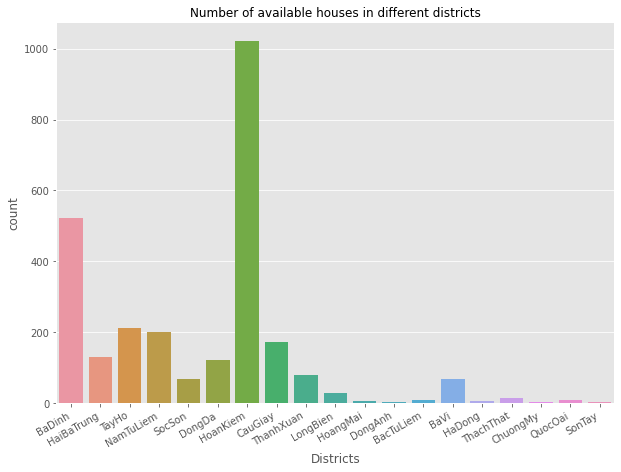

In [13]:
plt.figure(figsize= (10,7))
ax= sns.countplot(df['district'])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.xlabel('Districts', fontsize=12)
plt.title('Number of available houses in different districts', fontsize=12)
plt.show()

- HK and Badind have the most house listing as they are located in the centre of Hanoi. They have many tourist destinations such as HoGuom, Old streets, LangBac,...

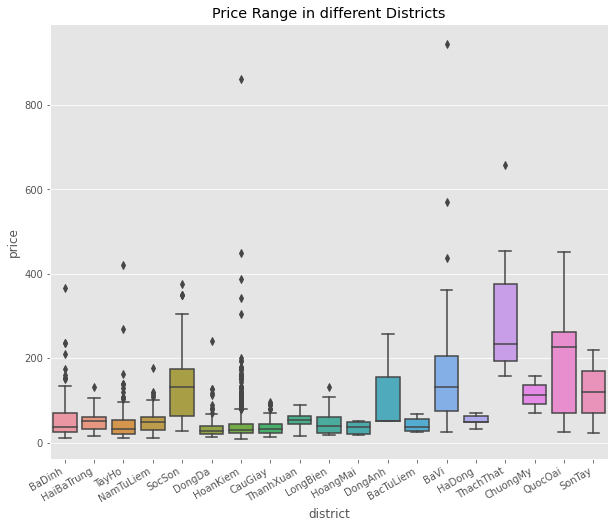

In [14]:
plt.figure(figsize= (10,8))
ax= sns.boxplot(x='district',y='price', data=df, orient= 'v')
plt.title('Price Range in different Districts')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

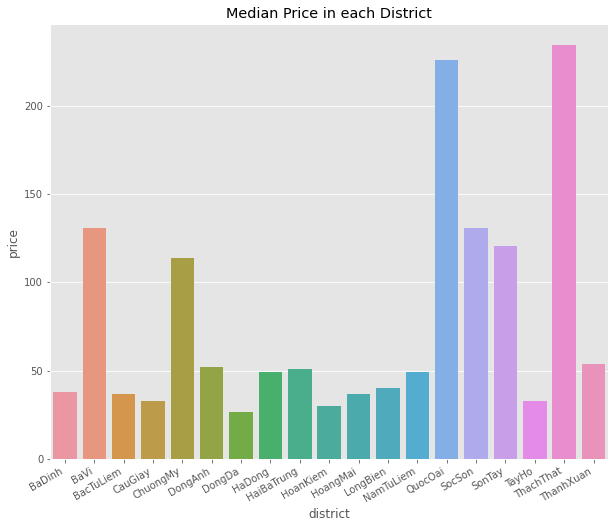

In [15]:
grouped= df.groupby('district')['price'].median()
grouped= grouped.reset_index()
plt.figure(figsize= (10,8))
ax= sns.barplot(x='district', y='price', data=grouped, ci= None)
plt.title('Median Price in each District')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

- Interesting, it is not HK and BD have the highest prices but QuocOai and ThachThat, which are faraway from the centre

In [16]:
#find out why thachthat n quocoai have such a high price given that they are faraway from the centre
df[df['district'] == 'ThachThat']

,price,district,type,building,guest,bedroom,bathroom
398,263.0,ThachThat,Villa,None,25,5,5
451,385.0,ThachThat,Villa,None,6,3,3
557,420.0,ThachThat,Villa,None,6,3,4
940,241.0,ThachThat,Villa,None,40,7,6
994,453.0,ThachThat,Villa,None,5,4,4
1349,228.0,ThachThat,Villa,None,30,6,6
2033,197.0,ThachThat,Villa,None,23,3,4
2046,193.0,ThachThat,Villa,None,16,4,4
2048,201.0,ThachThat,Villa,None,20,5,4
2127,184.0,ThachThat,Villa,None,25,5,6


In [17]:
df[df['district'] == 'QuocOai']

,price,district,type,building,guest,bedroom,bathroom
746,263.0,QuocOai,Villa,None,32,6,7
953,26.0,QuocOai,Villa,None,1,1,1
1562,451.0,QuocOai,Villa,None,35,7,5
1596,226.0,QuocOai,Villa,None,15,4,3
1598,226.0,QuocOai,Villa,None,20,3,2
2404,70.0,QuocOai,Villa,None,10,3,3
2416,44.0,QuocOai,Villa,None,2,1,1
2417,197.0,QuocOai,Villa,None,16,4,3
2437,263.0,QuocOai,Villa,None,40,7,5


- The type of houses in those two places are luxurious, for large groups of people to hold occations such as family picnic or company holidays

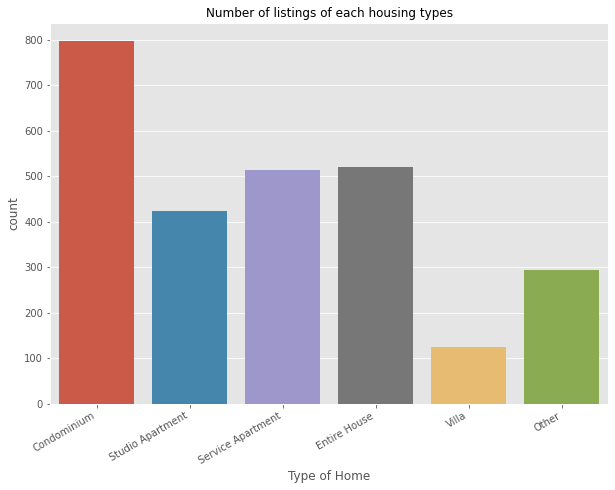

In [18]:
plt.figure(figsize= (10,7))
ax= sns.countplot(df['type'], order= ['Condominium', 'Studio Apartment', 'Service Apartment',
       'Entire House', 'Villa', 'Other'])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.xlabel('Type of Home', fontsize=12)
plt.title('Number of listings of each housing types', fontsize=12)
plt.show()

In [19]:
df['building'].nunique()

53

In [20]:
df['building'].value_counts().head(10)

None                           2227
VinhomesMetropolis              103
VinhomesSkyLake                  68
VinhomesGreenBay                 48
VinhomesTimesCity                40
VinhomesCapitaleTranDuyHung      23
ImperiaGarden                    18
VinhomesRoyalCity                15
MipecRiverside                   12
LancasterNuiTruc                 11
Name: building, dtype: int64

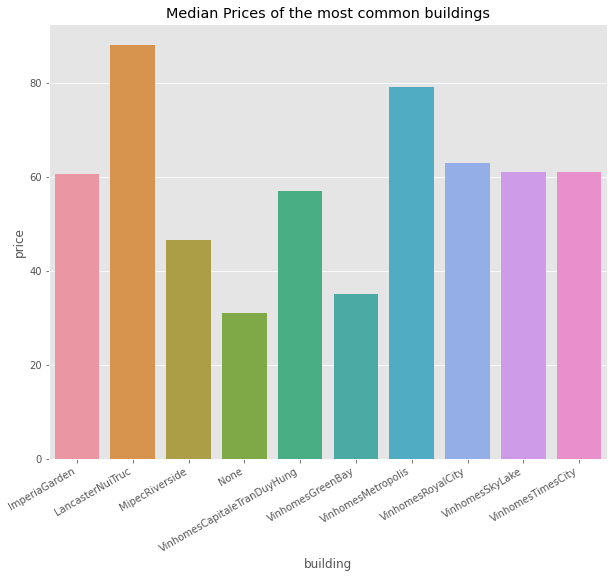

In [21]:
options= df['building'].value_counts().head(10).reset_index()
options.columns= ['building', 'count']
pop_building= list(options['building'])
df_pop_building= df[df['building'].isin(pop_building)]
grouped1= df_pop_building.groupby('building')['price'].median().reset_index()
plt.figure(figsize= (10,8))
ax= sns.barplot(x='building', y='price', data=grouped1, ci= None)
plt.title('Median Prices of the most common buildings')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

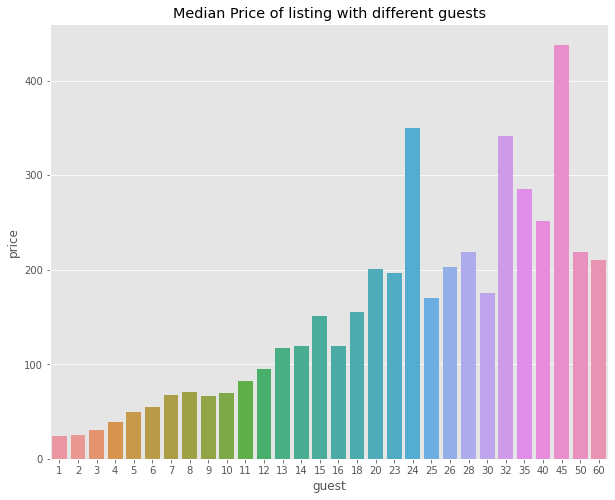

In [22]:
grouped2= df.groupby('guest')['price'].median().reset_index()
plt.figure(figsize= (10,8))
ax= sns.barplot(x='guest', y='price', data=grouped2, ci= None)
plt.title('Median Price of listing with different guests')
plt.show()

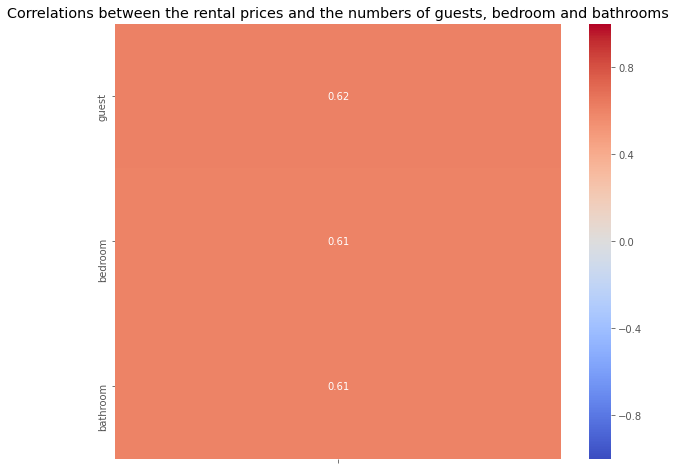

In [23]:
#create auto-correlation between price and numbers of guest, bathroom, bedroom to see which influence the most
correlations= df.corrwith(df['price']).iloc[1:].to_frame()
sorted_corr= correlations.sort_values(by=0 ,ascending= False)
sorted_corr.rename(columns= {0: ''}, inplace= True)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(sorted_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);
plt.title('Correlations between the rental prices and the numbers of guests, bedroom and bathrooms')
plt.show()

In [24]:
#create dummies
dist_dummy= pd.get_dummies(df['district'], drop_first= True)
type_dummy= pd.get_dummies(df['type']).drop('Other', axis=1)
building_dummy= pd.get_dummies(df['building']).drop('None', axis=1)

df_fe= pd.concat([df, dist_dummy, type_dummy, building_dummy], axis=1)
df_fe.drop(['building', 'district', 'type'], axis=1, inplace= True)

df_fe.head()

,price,guest,bedroom,bathroom,BaVi,BacTuLiem,CauGiay,ChuongMy,DongAnh,DongDa,...,VietDucComplex,VinataTower,VinhomesCapitaleTranDuyHung,VinhomesGardenia,VinhomesGreenBay,VinhomesMetropolis,VinhomesNguyenChiThanh,VinhomesRoyalCity,VinhomesSkyLake,VinhomesTimesCity
0,127.0,8,3,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,79.0,4,2,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,71.0,5,2,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,83.0,4,2,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,71.0,4,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_fe.to_csv('luxstay_hanoi_27-12-2019_feature_eng.csv', index=False, encoding='utf-8')

In [0]:
df_fe.shape

(2675, 79)